In [ ]:
#Mehwish Shabir
#Task_8_Intro_to_Autoencoders for Fashion MNIST

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping

In [27]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [28]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

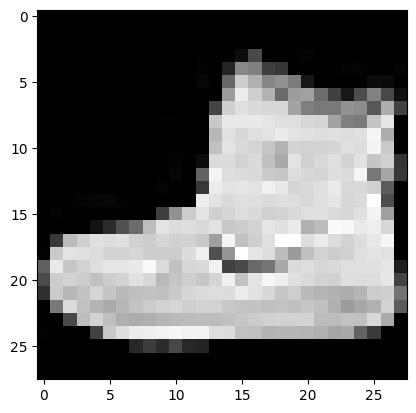

In [29]:
plt.imshow(x_train[0].reshape(28,28))

In [30]:
from keras.models import Model
from keras.layers import Input, Dense

input_dim = x_train.shape[1]
encoding_dim = 32

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(x_train, x_train,
epochs=100,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test),
callbacks=[early_stopping])

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4930 - val_loss: 0.3405
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.3316 - val_loss: 0.3188
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3138 - val_loss: 0.3072
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3030 - val_loss: 0.2996
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2964 - val_loss: 0.2946
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2919 - val_loss: 0.2918
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2889 - val_loss: 0.2900
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2872 - val_loss: 0.2887
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2861 - val_loss: 0.2881
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2850 - val_loss: 0.2874
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2852 - val_loss: 0.2869
Epoch 12/100
235/235 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


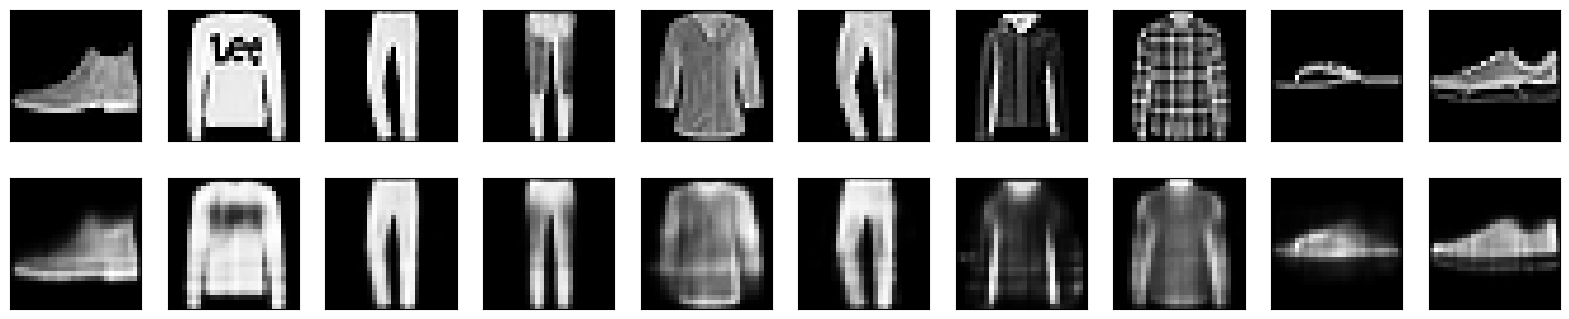

In [35]:
reconstructed_imgs = autoencoder.predict(x_test)
n = 10  # How many images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

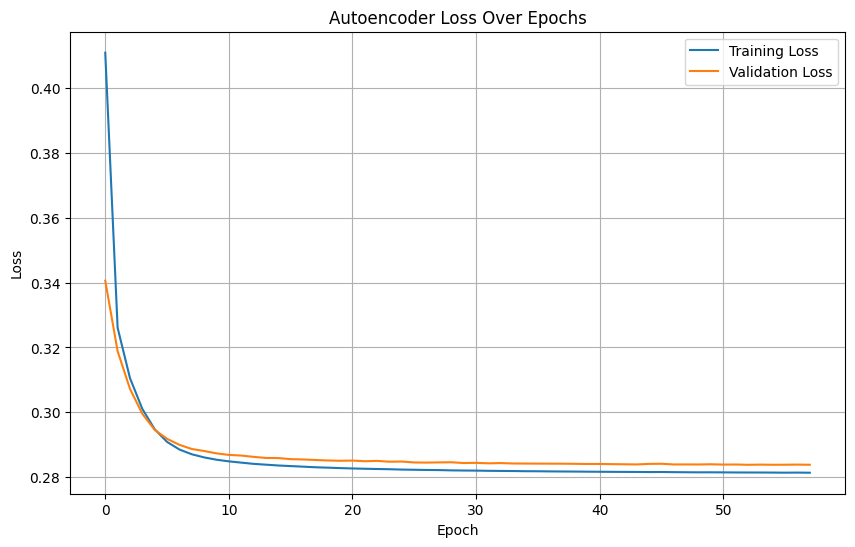

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
final_test_loss = history.history['val_loss'][-1]
print(f"Final Test Loss (Validation Loss): {final_test_loss:.4f}")

Final Test Loss (Validation Loss): 0.2839
